# Superparamagnetic Network - Machine Learning Testing

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants
import random as rnd

import SP_anisotropy_class as SPN

#3D plotting
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## The SP Network

$e = \frac{E}{KV}$, $H_K = \frac{2K}{\mu_0M_S}$, $h=\frac{H}{H_K}$, $k_\sigma=\frac{K_\sigma}{K}$, $\omega'=\frac{\omega}{f_0}$ and $\beta'=\frac{KV}{k_BT}$

$h=0.4$

$\theta_H=90°$

$\phi=45°$

$\beta'=10$

The system is at equilibrium with $k_\sigma=0$ and we instantly set $k_\sigma=1$.

$f_0=10^{10}Hz$

We call the characteristic memory time scale $T$.

In [2]:
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10
spn = SPN.SP_Network(h,theta_H,k_s_0,phi,beta_prime)

f0 = 1e10

In [3]:
spn.k_s = 1
SPN.calculate_energy_barriers(spn)
T = 1./(spn.get_omega_prime()*f0) #Characteristic memory time
t_step = T/100 #We take a t_step 100 times smaller than T
time = np.arange(0,5*T,t_step) #We want to see 5 T
m_t = [spn.get_m()]

for i in range(len(time)-1):
    spn.evolve(f0,t_step)
    m_t.append(spn.get_m())

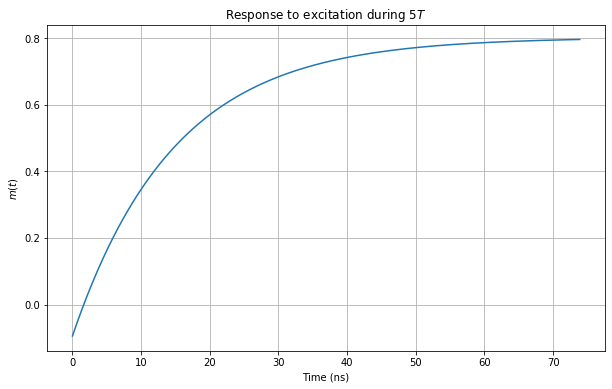

In [4]:
plt.figure(figsize=(10,6))
plt.plot(time*1e9,m_t)
plt.grid(True)
plt.title("Response to excitation during 5"+r'$T$')
plt.ylabel(r'$m(t)$')
plt.xlabel("Time (ns)")
plt.show()

Now let's use a random signal as input.

In [5]:
def rnd_signal(n):
    signal = []
    for i in range(n):
        signal.append(2*rnd.random()-1)
    return(signal)

In [9]:
spn = SPN.SP_Network(h,theta_H,k_s_0,phi,beta_prime)
SPN.calculate_energy_barriers(spn)
T = 1./(spn.get_omega_prime()*f0)

n = 10 #Number of inputs
N = 100 #Number of steps per input
theta = T #Duration of each input
t_step = theta/N #We take a t_step 100 times smaller than theta
signal = rnd_signal(n) #Input signal
time_signal = np.arange(n)*theta
time = np.linspace(0,n*theta,n*N)

m_t = []

for i in range(n):
    m_t.append(spn.get_m())
    spn.k_s = signal[i]
    SPN.calculate_energy_barriers(spn)
    for j in range(N-1):
        spn.evolve(f0,t_step)
        m_t.append(spn.get_m())

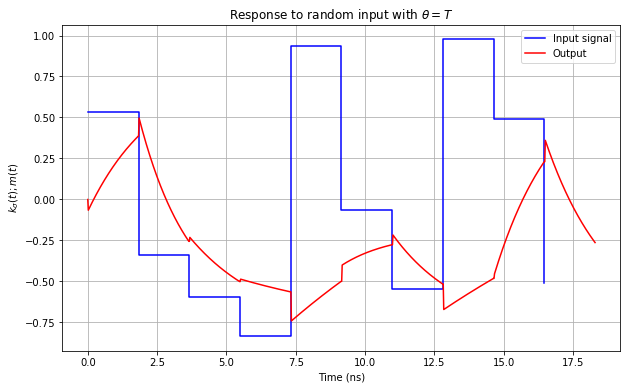

In [10]:
plt.figure(figsize=(10,6))
plt.plot(time_signal*1e9,signal,'b-',drawstyle='steps-post',label="Input signal")
plt.plot(time*1e9,m_t,'r-',label="Output")
plt.grid(True)
plt.legend(loc="best")
plt.title("Response to random input with "+r'$\theta=T$')
plt.ylabel(r'$k_\sigma(t) ; m(t)$')
plt.xlabel("Time (ns)")
plt.show()
plt.show()

In [11]:
spn = SPN.SP_Network(h,theta_H,k_s_0,phi,beta_prime)
SPN.calculate_energy_barriers(spn)
T = 1./(spn.get_omega_prime()*f0)

n = 10 #Number of inputs
N = 100 #Number of steps per input
theta = T/10 #Duration of each input
t_step = theta/N #We take a t_step 100 times smaller than theta
signal = rnd_signal(n) #Input signal
time_signal = np.arange(n)*theta
time = np.linspace(0,n*theta,n*N)

m_t = []

for i in range(n):
    m_t.append(spn.get_m())
    spn.k_s = signal[i]
    SPN.calculate_energy_barriers(spn)
    for j in range(N-1):
        spn.evolve(f0,t_step)
        m_t.append(spn.get_m())

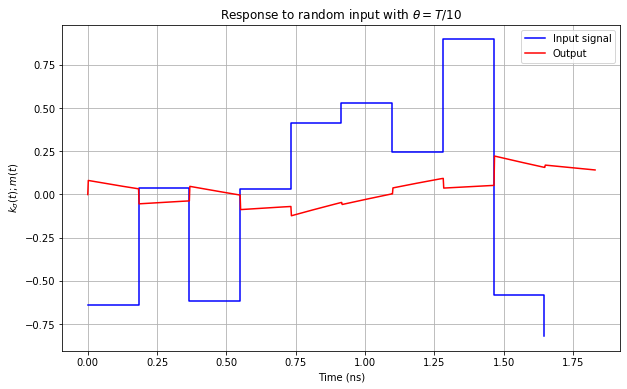

In [12]:
plt.figure(figsize=(10,6))
plt.plot(time_signal*1e9,signal,'b-',drawstyle='steps-post',label="Input signal")
plt.plot(time*1e9,m_t,'r-',label="Output")
plt.grid(True)
plt.legend(loc="best")
plt.title("Response to random input with "+r'$\theta=T/10$')
plt.ylabel(r'$k_\sigma(t) ; m(t)$')
plt.xlabel("Time (ns)")
plt.show()
plt.show()

In [13]:
spn = SPN.SP_Network(h,theta_H,k_s_0,phi,beta_prime)
SPN.calculate_energy_barriers(spn)
T = 1./(spn.get_omega_prime()*f0)

n = 10 #Number of inputs
N = 100 #Number of steps per input
theta = T*10 #Duration of each input
t_step = theta/N #We take a t_step 100 times smaller than tau_signal
signal = rnd_signal(n) #Input signal
time_signal = np.arange(n)*theta
time = np.linspace(0,n*theta,n*N)

m_t = []

for i in range(n):
    m_t.append(spn.get_m())
    spn.k_s = signal[i]
    SPN.calculate_energy_barriers(spn)
    for j in range(N-1):
        spn.evolve(f0,t_step)
        m_t.append(spn.get_m())

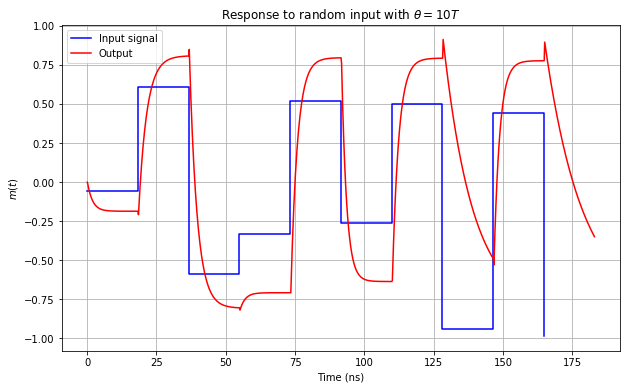

In [14]:
plt.figure(figsize=(10,6))
plt.plot(time_signal*1e9,signal,'b-',drawstyle='steps-post',label="Input signal")
plt.plot(time*1e9,m_t,'r-',label="Output")
plt.grid(True)
plt.legend(loc="best")
plt.title("Response to random input with "+r'$\theta=10T$')
plt.ylabel(r'$m(t)$')
plt.xlabel("Time (ns)")
plt.show()
plt.show()

## Towards Machine Learning

In [43]:
#Ignore the first 50 elements of the output
spacer = 50

In [44]:
def Ridge_regression(S, Y, alpha):
    '''
    For a linear layer we can solve the weights by a direct method
    If the error function is the mean square error given by
        E = |Y - S * W |^2 + \alpha |W|^2
    where the L2 norm is being applied and the variables are
        Y = [Nsamples x Noutputs] is the desired output
        S = [Nsamples x Nweights] is the input signal
        W = [Nweights x Noutputs] is the weight matrix
    To minimise E we need to solve:
        S^T * Y = (S^T * S  + \alpha I) * W
        W = (S^T*S + \alpha I)^-1 * S^T * Y
    '''
    STS = np.matmul(S.T, S)
    STY = np.matmul(S.T, Y)
    Sdag = np.linalg.pinv(STS + alpha*np.eye(len(STS)))
    return(np.matmul(Sdag, STY))

In [45]:
def NARMA10(Ns):
    # Ns is the number of samples
    u = np.random.random(Ns+50+spacer)*0.5
    y = np.zeros(Ns+50+spacer)
    for k in range(10,Ns+50+spacer):
        y[k] = 0.3*y[k-1] + 0.05*y[k-1]*np.sum(y[k-10:k]) + 1.5*u[k-1]*u[k-10] + 0.1
    return(u[50:],y[50+spacer:])

In [46]:
def mask_NARMA10(m0,Nvirt):
    # Nvirt is the number of virtual nodes
    mask = []
    for i in range(Nvirt):
        mask.append(rnd.choice([-1,1])*m0)
    mask = mask
    return(mask)

In [47]:
def NRMSE(Y,Y_pred):
    var = np.var(Y)
    return np.sqrt(np.square(Y_pred-Y).mean()/var)

def NRMSE_list(y,y_pred):
    Y = np.array(y)
    Y_pred = np.array(y_pred)
    return(NRMSE(Y,Y_pred))

In [123]:
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
f0 = 1e10
class Single_Node_Reservoir_NARMA10:
    
    def __init__(self, Nvirt, T_theta_ratio, m0, gamma, beta_prime = 10, bias = True):
        self.Nin = 1
        self.Nvirt = Nvirt
        self.Nout = 1
        
        self.spn = SPN.SP_Network(h,theta_H,k_s_0,phi,beta_prime)
        SPN.calculate_energy_barriers(self.spn)
        self.T = 1./(self.spn.get_omega_prime()*f0)
        self.theta = self.T/T_theta_ratio
        self.tau = self.Nvirt*self.theta
        
        self.m0 = m0
        self.M = mask_NARMA10(m0,Nvirt)
        if bias:
            self.W = np.zeros((Nvirt+1,1))
        else:
            self.W = np.zeros((Nvirt,1))
        
        self.gamma = gamma
        
        self.use_bias = bias
    
    def gen_signal(self, u):
        Ns = len(u)
        if self.use_bias:
            print("Use bias")
            S = np.zeros((Ns,self.Nvirt+1))
        else:
            S = np.zeros((Ns,self.Nvirt))
        
        for k in range(Ns):
            if k%100==0:
                print(k)
            for i in range(self.Nvirt):
                j = self.M[i]*u[k]
                self.spn.k_s = j + self.gamma*S[k-1,i] #Feedback 
                SPN.calculate_energy_barriers(self.spn)
                self.spn.evolve(f0,self.theta)
                S[k,i] = self.spn.get_m()
        
        if self.use_bias:
            for k in range(Ns):
                S[k,self.Nvirt] = 1
        
        return(S[spacer:])
    
    def gen_signal_fast(self,u):
        Ns = len(u)
        if self.use_bias:
            print("Use bias")
            S = np.zeros((Ns,self.Nvirt+1))
        else:
            S = np.zeros((Ns,self.Nvirt))
        
        for k in range(Ns):
            if k%100==0:
                print(k)
            for i in range(self.Nvirt):
                j = self.M[i]*u[k]
                self.spn.k_s = j + self.gamma*S[k-1,i] #Feedback 
                self.spn.evolve_fast(f0,self.theta)
                S[k,i] = self.spn.get_m_fast()
        
        if self.use_bias:
            for k in range(Ns):
                S[k,self.Nvirt] = 1
        
        return(S[spacer:])
    
    def gen_signal_without_SPN(self,u):
        Ns = len(u)
        J = np.zeros((Ns,self.Nvirt))
        
        for k in range(Ns):
            if k%100==0:
                print(k)
            for i in range(self.Nvirt):
                j = self.M[i]*u[k]
                J[k,i] = j + self.gamma*J[k-1,i] #J will be useful to test the role of memory and nonlinearity
                
        return(J[spacer:])
    
    def train(self, S, y, S_valid, y_valid):
        alphas = np.logspace(-15,0,20)
        alphas[0] = 0.
        
        Ns = S.shape[0]
        Ns_valid = S_valid.shape[0]
        Y = y.reshape((Ns,1))
        Y_valid = y_valid.reshape((Ns_valid,1))
        
        errs = np.zeros(alphas.shape)
        for i in range(len(alphas)):
            self.W = Ridge_regression(S, Y, alphas[i])
            Y_pred = np.array(self.predict(S)).reshape(Ns,1)
            Y_pred_valid = np.array(self.predict(S_valid)).reshape(Ns_valid,1)
            errs[i] = NRMSE(Y_valid, Y_pred_valid)
            print("alpha = " + str(alphas[i]) + " ; NRMSE (train) = " + str(int(1000*NRMSE(Y,Y_pred))/1000) + " ; NRMSE (validation) = " + str(int(1000*NRMSE(Y_valid, Y_pred_valid))/1000))
    
        alpha_opt = alphas[np.argmin(errs)]
        print('Optimal alpha = ' + str(alpha_opt) + ' with NRMSE (validation) = ' + str(np.min(errs)))
        self.W = Ridge_regression(S, Y, alpha_opt)
    
    def train_without_SPN(self, J, y, J_valid, y_valid):
        alphas = np.logspace(-10,-1,10)
        alphas[0] = 0.
        
        Ns = J.shape[0]
        Ns_valid = J_valid.shape[0]
        Y = y.reshape((Ns,1))
        Y_valid = y_valid.reshape((Ns_valid,1))
        
        errs = np.zeros(alphas.shape)
        for i in range(len(alphas)):
            self.W = Ridge_regression(J, Y, alphas[i])
            Y_pred_valid = np.array(self.predict(J_valid)).reshape(Ns_valid,1)
            errs[i] = NRMSE(Y_valid, Y_pred_valid)
            print(alphas[i], NRMSE(Y_valid, Y_pred_valid))
    
        alpha_opt = alphas[np.argmin(errs)]
        print('Optimal alpha = '+str(alpha_opt)+' with NRMSE = '+str(np.min(errs)))
        self.W = Ridge_regression(J, Y, alpha_opt)
    
    def predict(self, S):
        Ns = S.shape[0]
        return(np.matmul(S, self.W).reshape(1,Ns).tolist()[0])
    
    #Time lists (in ns)
    
    def get_time_list_u(self, u):
        #We need to make sure that time_u has Ns elements with a delay tau
        Ns = len(u)
        t_u = 0
        time_u = [t_u]
        while len(time_u)<Ns:
            t_u += self.tau
            time_u.append(t_u)
        return(np.array(time_u)*1e9)
    
    def get_time_list_y(self, y):
        #We need to make sure that time_y has Ns elements with a delay tau
        Ns = len(y)
        t_y = spacer*self.tau
        time_y = [t_y]
        while len(time_y)<Ns:
            t_y += self.tau
            time_y.append(t_y)
        return(np.array(time_y)*1e9)
    
    def get_time_list_S(self, S):
        Ns = S.shape[0]
        return(np.arange(spacer*self.tau,(Ns+spacer)*self.tau,self.theta)*1e9)

### The task : NARMA10

In [30]:
Ntrain = 500
(u,y) = NARMA10(Ntrain)

net = Single_Node_Reservoir_NARMA10(40,1e-2,8e-2,0.26)
time_u = net.get_time_list_u(u)
time_y = net.get_time_list_y(y)

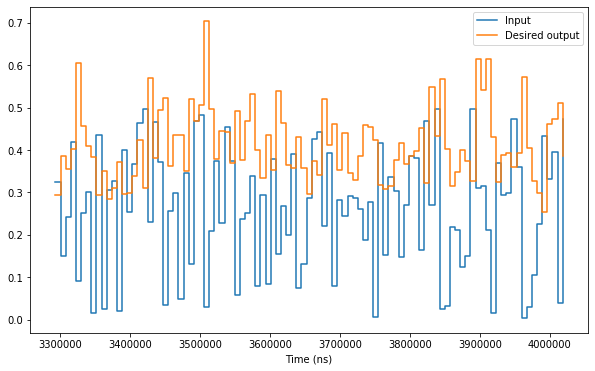

In [31]:
plt.figure(figsize=(10,6))
plt.plot(time_u[-100:],u[-100:],drawstyle='steps-post',label="Input")
plt.plot(time_y[-100:],y[-100:],drawstyle='steps-post',label="Desired output")
plt.xlabel("Time (ns)")
plt.legend(loc="best")
plt.show()

### Aspect of the output

In [32]:
S = net.gen_signal(u)
time_S = net.get_time_list_S(S)

Use bias
0
100
200
300
400
500


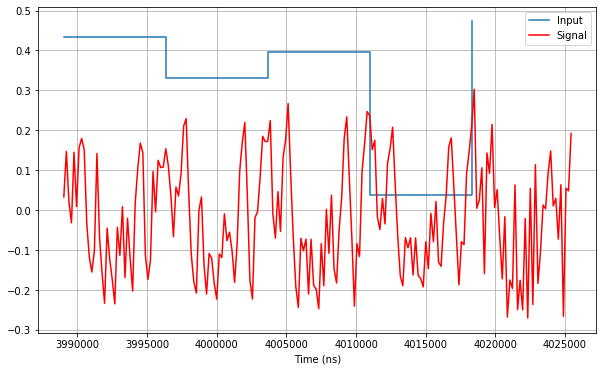

In [34]:
plt.figure(figsize=(10,6))
L = 5
plt.grid(True)
plt.plot(time_u[-L:],u[-L:],drawstyle='steps-post',label="Input")
#plt.plot(time_S[-L*net.Nvirt:],J.flatten()[-L*net.Nvirt:],drawstyle='steps-post',label="Transformed input")
plt.plot(time_S[-L*net.Nvirt:],S[:,:-1].flatten()[-L*net.Nvirt:],'r-',label="Signal")
plt.legend(loc="best")
plt.xlabel("Time (ns)")
#plt.ylim(-0.6,0.6)
plt.show()

In [111]:
T_theta_list = np.logspace(-3,2,15)
amplitude = []
Ntrain = 200
(u,y) = NARMA10(Ntrain)
N_mean = 10
L = 20
for T_t in T_theta_list:
    print(T_t)
    amp_mean = 0
    for i in range(N_mean):
        net = Single_Node_Reservoir_NARMA10(40,T_t,1,0.)
        S = net.gen_signal_fast(u)
        #M = max(S.flatten()[-L*net.Nvirt:])
        #m = min(S.flatten()[-L*net.Nvirt:])
        #amp_mean += M-m
        amp_mean += np.std(S.flatten())
    amplitude.append(amp_mean/N_mean)

0.001
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
0.0022758459260747888
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
0.005179474679231213
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
0.011787686347935873
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
0.02682695795279726
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
200
Use bias
0
100
20

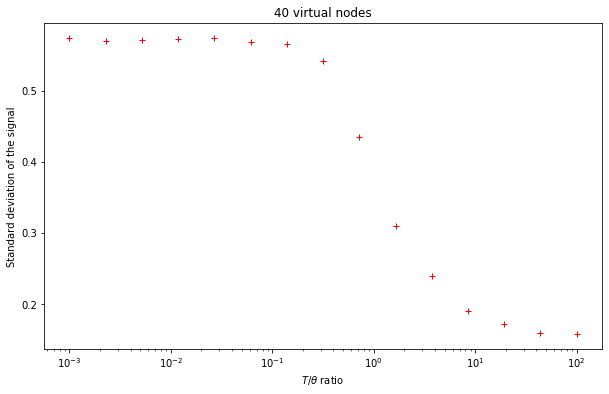

In [112]:
plt.figure(figsize=(10,6))
plt.plot(T_theta_list,amplitude,'r+')
plt.xscale("log")
plt.xlabel(r'$T/\theta$'+" ratio")
plt.ylabel("Standard deviation of the signal")
plt.title("40 virtual nodes")
plt.show()

### Training and fine-tuning

In [130]:
Ntrain = 5000
Nvalid = 5000

(u,y) = NARMA10(Ntrain)
(u_valid,y_valid) = NARMA10(Nvalid)

net = Single_Node_Reservoir_NARMA10(400,3,1e-2,0.25)
S = net.gen_signal_fast(u)
S_valid = net.gen_signal_fast(u_valid)

Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000


In [131]:
net.train(S,y,S_valid,y_valid)

alpha = 0.0 ; NRMSE (train) = 0.411 ; NRMSE (validation) = 0.447
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.411 ; NRMSE (validation) = 0.447
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.411 ; NRMSE (validation) = 0.447
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.411 ; NRMSE (validation) = 0.447
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.41 ; NRMSE (validation) = 0.447
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.406 ; NRMSE (validation) = 0.441
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.416 ; NRMSE (validation) = 0.45
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.426 ; NRMSE (validation) = 0.46
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.443 ; NRMSE (validation) = 0.475
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.461 ; NRMSE (validation) = 0.491
alpha = 7.847599703514623e-08 ; NRMSE (train) = 0.473 ; NRMSE (validation) = 0.501
alpha = 4.832930238571752e-07 ; NRMSE (train) = 0.485 ; NRMSE (validation) = 0.512
alpha = 2.976351441631

In [132]:
y_pred_train = net.predict(S)
y_pred_valid = net.predict(S_valid)

In [134]:
Ntest = 2000
(u_test,y_test) = NARMA10(Ntest)
S_test = net.gen_signal_fast(u_test)
y_pred_test = net.predict(S_test)

Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000


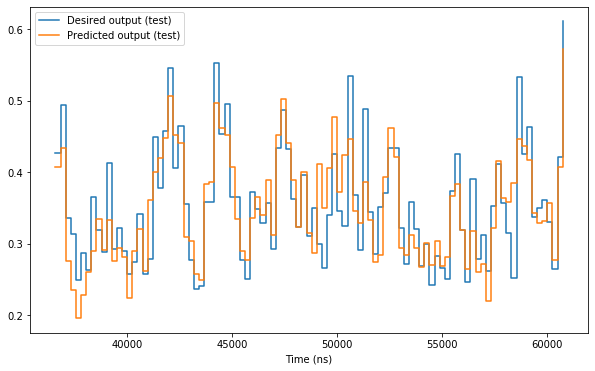

In [135]:
time_y = net.get_time_list_y(y_test)
plt.figure(figsize=(10,6))
xmin = 100
xmax = 200
plt.plot(time_y[xmin:xmax],y_test[xmin:xmax],drawstyle='steps-post',label="Desired output (test)")
plt.plot(time_y[xmin:xmax],y_pred_test[xmin:xmax],drawstyle='steps-post',label="Predicted output (test)")
plt.xlabel("Time (ns)")
plt.legend(loc="best")
plt.show()

NRMSE (train) = 0.4068732416835844


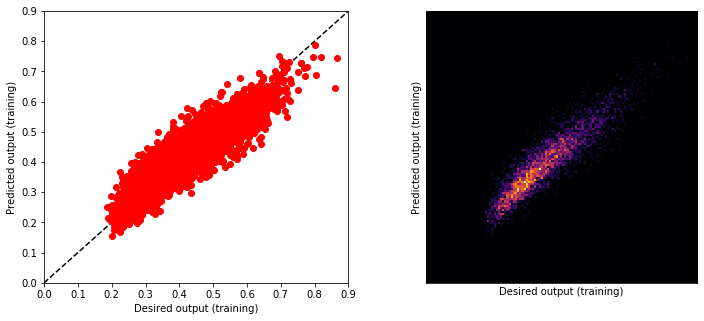

In [136]:
print("NRMSE (train) = "+str(NRMSE_list(y,y_pred_train)))
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(np.linspace(0,1.0),np.linspace(0,1.0), 'k--' )
plt.plot(y,y_pred_train,'ro')
plt.xlabel("Desired output (training)")
plt.ylabel("Predicted output (training)")
plt.xlim(0,0.9)
plt.ylim(0,0.9)
plt.subplot(122)
nbins = int(2*np.sqrt(Ntrain))
H, xedges, yedges  = np.histogram2d(y,y_pred_train,bins = nbins,range=[[0, 1], [0, 1]])
H = H.T
plt.imshow(H,origin='low',cmap='inferno')
plt.xlabel("Desired output (training)")
plt.ylabel("Predicted output (training)")
plt.xticks([],[''])
plt.yticks([],[''])
plt.xlim(0,0.9*nbins)
plt.ylim(0,0.9*nbins)
plt.show()

NRMSE (validation) = 0.44162839293014783


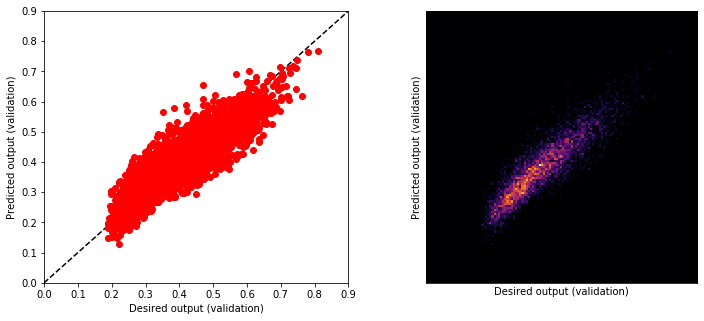

In [137]:
print("NRMSE (validation) = "+str(NRMSE_list(y_valid,y_pred_valid)))
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(np.linspace(0,1.0),np.linspace(0,1.0), 'k--' )
plt.plot(y_valid,y_pred_valid,'ro')
plt.xlabel("Desired output (validation)")
plt.ylabel("Predicted output (validation)")
plt.xlim(0,0.9)
plt.ylim(0,0.9)
plt.subplot(122)
nbins = int(2*np.sqrt(Nvalid))
H, xedges, yedges  = np.histogram2d(y_valid,y_pred_valid,bins = nbins,range=[[0, 1], [0, 1]])
H = H.T
plt.imshow(H,origin='low',cmap='inferno')
plt.xlabel("Desired output (validation)")
plt.ylabel("Predicted output (validation)")
plt.xticks([],[''])
plt.yticks([],[''])
plt.xlim(0,0.9*nbins)
plt.ylim(0,0.9*nbins)
plt.show()

NRMSE (test) = 0.43267594670472576


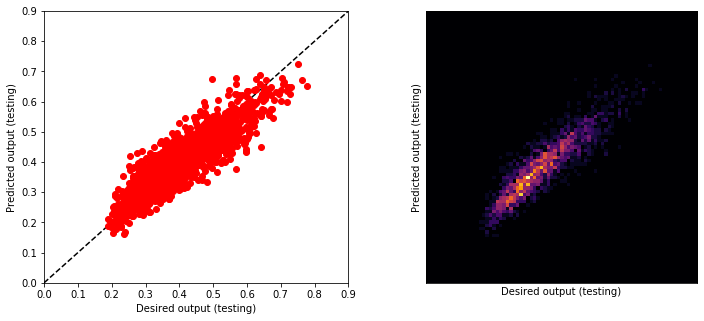

In [138]:
print("NRMSE (test) = "+str(NRMSE_list(y_test,y_pred_test)))
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(np.linspace(0,1.0),np.linspace(0,1.0), 'k--' )
plt.plot(y_test,y_pred_test,'ro')
plt.xlabel("Desired output (testing)")
plt.ylabel("Predicted output (testing)")
plt.xlim(0,0.9)
plt.ylim(0,0.9)
plt.subplot(122)
nbins = int(2*np.sqrt(Ntest))
H, xedges, yedges  = np.histogram2d(y_test,y_pred_test,bins = nbins,range=[[0, 1], [0, 1]])
H = H.T
plt.imshow(H,origin='low',cmap='inferno')
plt.xlabel("Desired output (testing)")
plt.ylabel("Predicted output (testing)")
plt.xticks([],[''])
plt.yticks([],[''])
plt.xlim(0,0.9*nbins)
plt.ylim(0,0.9*nbins)
plt.show()

#### 1. Influence of $T/\theta$

In [121]:
T_theta_list = np.logspace(-1,1.5,8)

Ntrain = 1500
Nvalid = 1500
Ntest = 750

(u,y) = NARMA10(Ntrain)
(u_valid,y_valid) = NARMA10(Nvalid)
(u_test,y_test) = NARMA10(Ntest)

NRMSE_train_mean = []
NRMSE_valid_mean = []
NRMSE_test_mean = []
NRMSE_train_std = []
NRMSE_valid_std = []
NRMSE_test_std = []

N = 5

for T_t in T_theta_list:
    print(T_t)
    NRMSE_train = []
    NRMSE_valid = []
    NRMSE_test = []
    
    for i in range(N):
        net = Single_Node_Reservoir_NARMA10(100,T_t,1e-2,0.25)

        S = net.gen_signal_fast(u)
        S_valid = net.gen_signal_fast(u_valid)
        S_test = net.gen_signal_fast(u_test)

        net.train(S,y,S_valid,y_valid)

        y_pred_train = net.predict(S)
        y_pred_valid = net.predict(S_valid)
        y_pred_test = net.predict(S_test)

        NRMSE_train.append(NRMSE_list(y,y_pred_train))
        NRMSE_valid.append(NRMSE_list(y_valid,y_pred_valid))
        NRMSE_test.append(NRMSE_list(y_test,y_pred_test))
    
    NRMSE_train_mean.append(np.mean(NRMSE_train))
    NRMSE_valid_mean.append(np.mean(NRMSE_valid))
    NRMSE_test_mean.append(np.mean(NRMSE_test))
    NRMSE_train_std.append(np.std(NRMSE_train,ddof=min(1,N-1)))
    NRMSE_valid_std.append(np.std(NRMSE_valid,ddof=min(1,N-1)))
    NRMSE_test_std.append(np.std(NRMSE_test,ddof=min(1,N-1)))

0.1
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
Use bias
0
100
200
300
400
500
600
alpha = 0.0 ; NRMSE (train) = 0.819 ; NRMSE (validation) = 0.731
alpha = 3.792690190732254e-10 ; NRMSE (train) = 0.825 ; NRMSE (validation) = 0.736
alpha = 1.4384498882876659e-09 ; NRMSE (train) = 0.828 ; NRMSE (validation) = 0.739
alpha = 5.455594781168515e-09 ; NRMSE (train) = 0.829 ; NRMSE (validation) = 0.74
alpha = 2.0691380811147902e-08 ; NRMSE (train) = 0.829 ; NRMSE (validation) = 0.741
alpha = 7.847599703514623e-08 ; NRMSE (train) = 0.829 ; NRMSE (validation) = 0.741
alpha = 2.976351441631319e-07 ; NRMSE (train) = 0.829 ; NRMSE (validation) = 0.741
alpha = 1.1288378916846883e-06 ; NRMSE (train) = 0.829 ; NRMSE (validation) = 0.741
alpha = 4.281332398719396e-06 ; NRMSE (train) = 0.829 ; NRMSE (validation) = 0.741
alpha = 1.6237767391887242e-05 ; NRMSE (train) = 0.829 ; NRMSE (validation) = 0.741
alpha = 6.158482110660267e-05 ; NR

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
Use bias
0
100
200
300
400
500
600
alpha = 0.0 ; NRMSE (train) = 0.772 ; NRMSE (validation) = 0.707
alpha = 3.792690190732254e-10 ; NRMSE (train) = 0.808 ; NRMSE (validation) = 0.714
alpha = 1.4384498882876659e-09 ; NRMSE (train) = 0.812 ; NRMSE (validation) = 0.717
alpha = 5.455594781168515e-09 ; NRMSE (train) = 0.813 ; NRMSE (validation) = 0.718
alpha = 2.0691380811147902e-08 ; NRMSE (train) = 0.814 ; NRMSE (validation) = 0.719
alpha = 7.847599703514623e-08 ; NRMSE (train) = 0.815 ; NRMSE (validation) = 0.72
alpha = 2.976351441631319e-07 ; NRMSE (train) = 0.815 ; NRMSE (validation) = 0.72
alpha = 1.1288378916846883e-06 ; NRMSE (train) = 0.816 ; NRMSE (validation) = 0.721
alpha = 4.281332398719396e-06 ; NRMSE (train) = 0.817 ; NRMSE (validation) = 0.723
alpha = 1.6237767391887242e-05 ; NRMSE (train) = 0.82 ; NRMSE (validation) = 0.729
alpha = 6.158482110660267e-05 ; NRMSE (train) = 0.8

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
Use bias
0
100
200
300
400
500
600
alpha = 0.0 ; NRMSE (train) = 0.574 ; NRMSE (validation) = 0.567
alpha = 3.792690190732254e-10 ; NRMSE (train) = 0.588 ; NRMSE (validation) = 0.561
alpha = 1.4384498882876659e-09 ; NRMSE (train) = 0.592 ; NRMSE (validation) = 0.563
alpha = 5.455594781168515e-09 ; NRMSE (train) = 0.597 ; NRMSE (validation) = 0.564
alpha = 2.0691380811147902e-08 ; NRMSE (train) = 0.601 ; NRMSE (validation) = 0.564
alpha = 7.847599703514623e-08 ; NRMSE (train) = 0.606 ; NRMSE (validation) = 0.564
alpha = 2.976351441631319e-07 ; NRMSE (train) = 0.609 ; NRMSE (validation) = 0.566
alpha = 1.1288378916846883e-06 ; NRMSE (train) = 0.615 ; NRMSE (validation) = 0.573
alpha = 4.281332398719396e-06 ; NRMSE (train) = 0.625 ; NRMSE (validation) = 0.585
alpha = 1.6237767391887242e-05 ; NRMSE (train) = 0.641 ; NRMSE (validation) = 0.594
alpha = 6.158482110660267e-05 ; NRMSE (train) = 

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
Use bias
0
100
200
300
400
500
600
alpha = 0.0 ; NRMSE (train) = 0.496 ; NRMSE (validation) = 0.537
alpha = 3.792690190732254e-10 ; NRMSE (train) = 0.513 ; NRMSE (validation) = 0.496
alpha = 1.4384498882876659e-09 ; NRMSE (train) = 0.518 ; NRMSE (validation) = 0.493
alpha = 5.455594781168515e-09 ; NRMSE (train) = 0.525 ; NRMSE (validation) = 0.494
alpha = 2.0691380811147902e-08 ; NRMSE (train) = 0.534 ; NRMSE (validation) = 0.501
alpha = 7.847599703514623e-08 ; NRMSE (train) = 0.544 ; NRMSE (validation) = 0.509
alpha = 2.976351441631319e-07 ; NRMSE (train) = 0.552 ; NRMSE (validation) = 0.517
alpha = 1.1288378916846883e-06 ; NRMSE (train) = 0.562 ; NRMSE (validation) = 0.525
alpha = 4.281332398719396e-06 ; NRMSE (train) = 0.577 ; NRMSE (validation) = 0.539
alpha = 1.6237767391887242e-05 ; NRMSE (train) = 0.595 ; NRMSE (validation) = 0.557
alpha = 6.158482110660267e-05 ; NRMSE (train) = 

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
Use bias
0
100
200
300
400
500
600
alpha = 0.0 ; NRMSE (train) = 0.451 ; NRMSE (validation) = 0.469
alpha = 3.792690190732254e-10 ; NRMSE (train) = 0.492 ; NRMSE (validation) = 0.482
alpha = 1.4384498882876659e-09 ; NRMSE (train) = 0.501 ; NRMSE (validation) = 0.489
alpha = 5.455594781168515e-09 ; NRMSE (train) = 0.506 ; NRMSE (validation) = 0.493
alpha = 2.0691380811147902e-08 ; NRMSE (train) = 0.513 ; NRMSE (validation) = 0.496
alpha = 7.847599703514623e-08 ; NRMSE (train) = 0.523 ; NRMSE (validation) = 0.501
alpha = 2.976351441631319e-07 ; NRMSE (train) = 0.532 ; NRMSE (validation) = 0.507
alpha = 1.1288378916846883e-06 ; NRMSE (train) = 0.539 ; NRMSE (validation) = 0.511
alpha = 4.281332398719396e-06 ; NRMSE (train) = 0.546 ; NRMSE (validation) = 0.517
alpha = 1.6237767391887242e-05 ; NRMSE (train) = 0.556 ; NRMSE (validation) = 0.528
alpha = 6.158482110660267e-05 ; NRMSE (train) = 

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
Use bias
0
100
200
300
400
500
600
alpha = 0.0 ; NRMSE (train) = 0.474 ; NRMSE (validation) = 0.469
alpha = 3.792690190732254e-10 ; NRMSE (train) = 0.492 ; NRMSE (validation) = 0.476
alpha = 1.4384498882876659e-09 ; NRMSE (train) = 0.496 ; NRMSE (validation) = 0.478
alpha = 5.455594781168515e-09 ; NRMSE (train) = 0.501 ; NRMSE (validation) = 0.48
alpha = 2.0691380811147902e-08 ; NRMSE (train) = 0.507 ; NRMSE (validation) = 0.483
alpha = 7.847599703514623e-08 ; NRMSE (train) = 0.511 ; NRMSE (validation) = 0.486
alpha = 2.976351441631319e-07 ; NRMSE (train) = 0.518 ; NRMSE (validation) = 0.494
alpha = 1.1288378916846883e-06 ; NRMSE (train) = 0.534 ; NRMSE (validation) = 0.511
alpha = 4.281332398719396e-06 ; NRMSE (train) = 0.551 ; NRMSE (validation) = 0.528
alpha = 1.6237767391887242e-05 ; NRMSE (train) = 0.562 ; NRMSE (validation) = 0.538
alpha = 6.158482110660267e-05 ; NRMSE (train) = 0

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
Use bias
0
100
200
300
400
500
600
alpha = 0.0 ; NRMSE (train) = 0.491 ; NRMSE (validation) = 0.477
alpha = 3.792690190732254e-10 ; NRMSE (train) = 0.509 ; NRMSE (validation) = 0.486
alpha = 1.4384498882876659e-09 ; NRMSE (train) = 0.513 ; NRMSE (validation) = 0.49
alpha = 5.455594781168515e-09 ; NRMSE (train) = 0.523 ; NRMSE (validation) = 0.5
alpha = 2.0691380811147902e-08 ; NRMSE (train) = 0.544 ; NRMSE (validation) = 0.522
alpha = 7.847599703514623e-08 ; NRMSE (train) = 0.585 ; NRMSE (validation) = 0.561
alpha = 2.976351441631319e-07 ; NRMSE (train) = 0.626 ; NRMSE (validation) = 0.602
alpha = 1.1288378916846883e-06 ; NRMSE (train) = 0.659 ; NRMSE (validation) = 0.635
alpha = 4.281332398719396e-06 ; NRMSE (train) = 0.686 ; NRMSE (validation) = 0.664
alpha = 1.6237767391887242e-05 ; NRMSE (train) = 0.707 ; NRMSE (validation) = 0.688
alpha = 6.158482110660267e-05 ; NRMSE (train) = 0.7

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
Use bias
0
100
200
300
400
500
600
alpha = 0.0 ; NRMSE (train) = 0.706 ; NRMSE (validation) = 0.666
alpha = 3.792690190732254e-10 ; NRMSE (train) = 0.714 ; NRMSE (validation) = 0.674
alpha = 1.4384498882876659e-09 ; NRMSE (train) = 0.718 ; NRMSE (validation) = 0.679
alpha = 5.455594781168515e-09 ; NRMSE (train) = 0.721 ; NRMSE (validation) = 0.683
alpha = 2.0691380811147902e-08 ; NRMSE (train) = 0.724 ; NRMSE (validation) = 0.688
alpha = 7.847599703514623e-08 ; NRMSE (train) = 0.727 ; NRMSE (validation) = 0.693
alpha = 2.976351441631319e-07 ; NRMSE (train) = 0.729 ; NRMSE (validation) = 0.696
alpha = 1.1288378916846883e-06 ; NRMSE (train) = 0.73 ; NRMSE (validation) = 0.699
alpha = 4.281332398719396e-06 ; NRMSE (train) = 0.732 ; NRMSE (validation) = 0.701
alpha = 1.6237767391887242e-05 ; NRMSE (train) = 0.732 ; NRMSE (validation) = 0.702
alpha = 6.158482110660267e-05 ; NRMSE (train) = 0

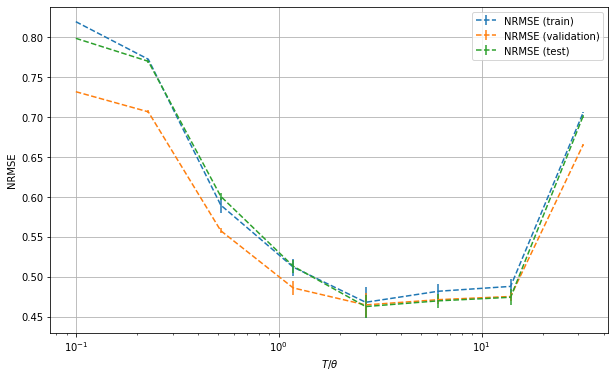

In [122]:
plt.figure(figsize=(10,6))
plt.errorbar(T_theta_list,NRMSE_train_mean,NRMSE_train_std,linestyle = '--',label="NRMSE (train)")
plt.errorbar(T_theta_list,NRMSE_valid_mean,NRMSE_valid_std,linestyle = '--',label="NRMSE (validation)")
plt.errorbar(T_theta_list,NRMSE_test_mean,NRMSE_test_std,linestyle = '--',label="NRMSE (test)")
plt.grid(True)
plt.legend(loc="best")
plt.xlabel(r'$T/\theta$')
plt.ylabel("NRMSE")
plt.xscale("log")
plt.show()

#### 2. Is the superparmagnetic network important?

In [72]:
Ntrain = 1500
Nvalid = 600
Ntest = 600

(u,y) = NARMA10(Ntrain)
(u_valid,y_valid) = NARMA10(Nvalid)
(u_test,y_test) = NARMA10(Ntest)

net = Single_Node_Reservoir_NARMA10(100,1e-1,3*8e-2,0.26,bias=False)

J = net.gen_signal_without_SPN(u)
J_valid = net.gen_signal_without_SPN(u_valid)
J_test = net.gen_signal_without_SPN(u_test)

net.train_without_SPN(J,y,J_valid,y_valid)

y_pred_train = net.predict(J)
y_pred_valid = net.predict(J_valid)
y_pred_test = net.predict(J_test)

print("NRMSE (train) = "+str(NRMSE_list(y,y_pred_train)))
print("NRMSE (validation) = "+str(NRMSE_list(y_valid,y_pred_valid)))
print("NRMSE (test) = "+str(NRMSE_list(y_test,y_pred_test)))

0
100
200
300
400
500
0
100
200
0
100
200
0.0 1.375440821738229
1e-09 1.3753755001269876
1e-08 1.3753754189951442
1e-07 1.3753754085718501
1e-06 1.3753754073641224
1e-05 1.3753754083052014
0.0001 1.3753754187395182
0.001 1.375375522994481
0.01 1.3753765728417335
0.1 1.3753878015817607
Optimal alpha = 1e-06 with NRMSE = 1.3753754073641224
NRMSE (train) = 1.6193194568747356
NRMSE (validation) = 1.3753754073641224
NRMSE (test) = 1.9672729582748827


$T/\theta$ must be very low! Which means that the "memory" is useless when there is a feedback... The network doesn't work when we use J instead of S (without SPN) which tends to show that the crucial aspect of the SPN in nonlinearity (but not memory).

#### 3. Influence of $m_0$

In [119]:
m0_list = np.logspace(-2,0,8)

Ntrain = 1500
Nvalid = 1500
Ntest = 750

(u,y) = NARMA10(Ntrain)
(u_valid,y_valid) = NARMA10(Nvalid)
(u_test,y_test) = NARMA10(Ntest)

NRMSE_train_mean = []
NRMSE_valid_mean = []
NRMSE_test_mean = []
NRMSE_train_std = []
NRMSE_valid_std = []
NRMSE_test_std = []

N = 5

for m0 in m0_list:
    print(m0)
    NRMSE_train = []
    NRMSE_valid = []
    NRMSE_test = []
    
    for i in range(N):
        net = Single_Node_Reservoir_NARMA10(100,3,m0,0.26)

        S = net.gen_signal_fast(u)
        S_valid = net.gen_signal_fast(u_valid)
        S_test = net.gen_signal_fast(u_test)

        net.train(S,y,S_valid,y_valid)

        y_pred_train = net.predict(S)
        y_pred_valid = net.predict(S_valid)
        y_pred_test = net.predict(S_test)
        
        NRMSE_train.append(NRMSE_list(y,y_pred_train))
        NRMSE_valid.append(NRMSE_list(y_valid,y_pred_valid))
        NRMSE_test.append(NRMSE_list(y_test,y_pred_test))
        
    NRMSE_train_mean.append(np.mean(NRMSE_train))
    NRMSE_valid_mean.append(np.mean(NRMSE_valid))
    NRMSE_test_mean.append(np.mean(NRMSE_test))
    NRMSE_train_std.append(np.std(NRMSE_train,ddof=min(1,N-1)))
    NRMSE_valid_std.append(np.std(NRMSE_valid,ddof=min(1,N-1)))
    NRMSE_test_std.append(np.std(NRMSE_test,ddof=min(1,N-1)))

0.01
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
Use bias
0
100
200
300
400
500
600
alpha = 0.0 ; NRMSE (train) = 0.445 ; NRMSE (validation) = 0.447
alpha = 3.792690190732254e-10 ; NRMSE (train) = 0.464 ; NRMSE (validation) = 0.452
alpha = 1.4384498882876659e-09 ; NRMSE (train) = 0.474 ; NRMSE (validation) = 0.461
alpha = 5.455594781168515e-09 ; NRMSE (train) = 0.488 ; NRMSE (validation) = 0.469
alpha = 2.0691380811147902e-08 ; NRMSE (train) = 0.501 ; NRMSE (validation) = 0.473
alpha = 7.847599703514623e-08 ; NRMSE (train) = 0.511 ; NRMSE (validation) = 0.479
alpha = 2.976351441631319e-07 ; NRMSE (train) = 0.52 ; NRMSE (validation) = 0.489
alpha = 1.1288378916846883e-06 ; NRMSE (train) = 0.532 ; NRMSE (validation) = 0.503
alpha = 4.281332398719396e-06 ; NRMSE (train) = 0.544 ; NRMSE (validation) = 0.515
alpha = 1.6237767391887242e-05 ; NRMSE (train) = 0.56 ; NRMSE (validation) = 0.528
alpha = 6.158482110660267e-05 ; NR

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
Use bias
0
100
200
300
400
500
600
alpha = 0.0 ; NRMSE (train) = 0.602 ; NRMSE (validation) = 0.643
alpha = 3.792690190732254e-10 ; NRMSE (train) = 0.602 ; NRMSE (validation) = 0.643
alpha = 1.4384498882876659e-09 ; NRMSE (train) = 0.602 ; NRMSE (validation) = 0.643
alpha = 5.455594781168515e-09 ; NRMSE (train) = 0.602 ; NRMSE (validation) = 0.643
alpha = 2.0691380811147902e-08 ; NRMSE (train) = 0.602 ; NRMSE (validation) = 0.643
alpha = 7.847599703514623e-08 ; NRMSE (train) = 0.602 ; NRMSE (validation) = 0.643
alpha = 2.976351441631319e-07 ; NRMSE (train) = 0.602 ; NRMSE (validation) = 0.641
alpha = 1.1288378916846883e-06 ; NRMSE (train) = 0.603 ; NRMSE (validation) = 0.638
alpha = 4.281332398719396e-06 ; NRMSE (train) = 0.607 ; NRMSE (validation) = 0.633
alpha = 1.6237767391887242e-05 ; NRMSE (train) = 0.614 ; NRMSE (validation) = 0.63
alpha = 6.158482110660267e-05 ; NRMSE (train) = 0

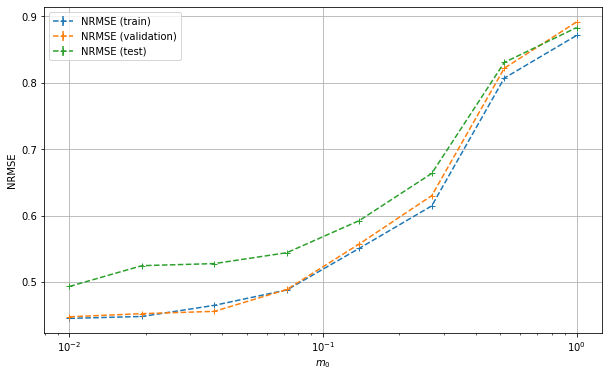

In [120]:
plt.figure(figsize=(10,6))
plt.errorbar(m0_list,NRMSE_train_mean,NRMSE_train_std,linestyle = '--',label="NRMSE (train)")
plt.errorbar(m0_list,NRMSE_valid_mean,NRMSE_valid_std,linestyle = '--',label="NRMSE (validation)")
plt.errorbar(m0_list,NRMSE_test_mean,NRMSE_test_std,linestyle = '--',label="NRMSE (test)")
plt.grid(True)
plt.legend(loc="best")
plt.xlabel(r'$m_0$')
plt.ylabel("NRMSE")
plt.xscale("log")
plt.show()

#### 4. Influence of $\gamma$

In [126]:
gamma_list = np.arange(0.1,0.5,0.05)

Ntrain = 1500
Nvalid = 1500
Ntest = 750

(u,y) = NARMA10(Ntrain)
(u_valid,y_valid) = NARMA10(Nvalid)
(u_test,y_test) = NARMA10(Ntest)

NRMSE_train_mean = []
NRMSE_valid_mean = []
NRMSE_test_mean = []
NRMSE_train_std = []
NRMSE_valid_std = []
NRMSE_test_std = []

N = 5

for gamma in gamma_list:
    print(gamma)
    NRMSE_train = []
    NRMSE_valid = []
    NRMSE_test = []
    
    for i in range(N):
        net = Single_Node_Reservoir_NARMA10(100,3,1e-2,gamma)

        S = net.gen_signal_fast(u)
        S_valid = net.gen_signal_fast(u_valid)
        S_test = net.gen_signal_fast(u_test)

        net.train(S,y,S_valid,y_valid)

        y_pred_train = net.predict(S)
        y_pred_valid = net.predict(S_valid)
        y_pred_test = net.predict(S_test)
        
        NRMSE_train.append(NRMSE_list(y,y_pred_train))
        NRMSE_valid.append(NRMSE_list(y_valid,y_pred_valid))
        NRMSE_test.append(NRMSE_list(y_test,y_pred_test))
        
    NRMSE_train_mean.append(np.mean(NRMSE_train))
    NRMSE_valid_mean.append(np.mean(NRMSE_valid))
    NRMSE_test_mean.append(np.mean(NRMSE_test))
    NRMSE_train_std.append(np.std(NRMSE_train,ddof=min(1,N-1)))
    NRMSE_valid_std.append(np.std(NRMSE_valid,ddof=min(1,N-1)))
    NRMSE_test_std.append(np.std(NRMSE_test,ddof=min(1,N-1)))

0.1
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
alpha = 0.0 ; NRMSE (train) = 0.721 ; NRMSE (validation) = 0.732
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.721 ; NRMSE (validation) = 0.732
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.721 ; NRMSE (validation) = 0.732
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.721 ; NRMSE (validation) = 0.733
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.723 ; NRMSE (validation) = 0.737
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.746 ; NRMSE (validation) = 0.762
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.767 ; NRMSE (validation) = 0.783
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.778 ; NRMSE (validation) = 0.792
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.786 ; NRMSE (validation) = 0.798
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.789 ; NRMSE (validati

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
alpha = 0.0 ; NRMSE (train) = 0.658 ; NRMSE (validation) = 1.049
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.658 ; NRMSE (validation) = 1.049
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.658 ; NRMSE (validation) = 1.049
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.658 ; NRMSE (validation) = 1.05
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.658 ; NRMSE (validation) = 1.047
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.646 ; NRMSE (validation) = 1.051
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.628 ; NRMSE (validation) = 1.07
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.679 ; NRMSE (validation) = 0.869
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.723 ; NRMSE (validation) = 0.807
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.753 ; NRMSE (validation) = 0.801
alpha

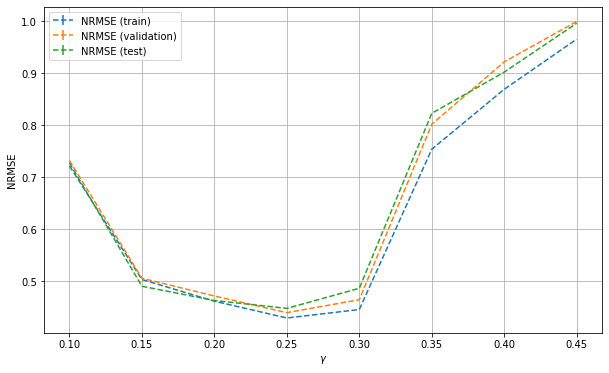

In [127]:
plt.figure(figsize=(10,6))
plt.errorbar(gamma_list,NRMSE_train_mean,NRMSE_train_std,linestyle = '--',label="NRMSE (train)")
plt.errorbar(gamma_list,NRMSE_valid_mean,NRMSE_valid_std,linestyle = '--',label="NRMSE (validation)")
plt.errorbar(gamma_list,NRMSE_test_mean,NRMSE_test_std,linestyle = '--',label="NRMSE (test)")
plt.grid(True)
plt.legend(loc="best")
plt.xlabel(r'$\gamma$')
plt.ylabel("NRMSE")
#plt.xscale("log")
plt.show()

#### 4. Importance of the bias

In [129]:
bias_list = [True,False]

Ntrain = 1500
Nvalid = 1500
Ntest = 750

(u,y) = NARMA10(Ntrain)
(u_valid,y_valid) = NARMA10(Nvalid)
(u_test,y_test) = NARMA10(Ntest)

NRMSE_train_mean = []
NRMSE_valid_mean = []
NRMSE_test_mean = []
NRMSE_train_std = []
NRMSE_valid_std = []
NRMSE_test_std = []

N = 3

for use_bias in bias_list:
    NRMSE_train = []
    NRMSE_valid = []
    NRMSE_test = []
    
    for i in range(N):
        net = Single_Node_Reservoir_NARMA10(100,3,1e-2,0.25,bias=use_bias)

        S = net.gen_signal_fast(u)
        S_valid = net.gen_signal_fast(u_valid)
        S_test = net.gen_signal_fast(u_test)

        net.train(S,y,S_valid,y_valid)

        y_pred_train = net.predict(S)
        y_pred_valid = net.predict(S_valid)
        y_pred_test = net.predict(S_test)
        
        NRMSE_train.append(NRMSE_list(y,y_pred_train))
        NRMSE_valid.append(NRMSE_list(y_valid,y_pred_valid))
        NRMSE_test.append(NRMSE_list(y_test,y_pred_test))
        
    NRMSE_train_mean.append(np.mean(NRMSE_train))
    NRMSE_valid_mean.append(np.mean(NRMSE_valid))
    NRMSE_test_mean.append(np.mean(NRMSE_test))
    NRMSE_train_std.append(np.std(NRMSE_train,ddof=min(1,N-1)))
    NRMSE_valid_std.append(np.std(NRMSE_valid,ddof=min(1,N-1)))
    NRMSE_test_std.append(np.std(NRMSE_test,ddof=min(1,N-1)))
    
print(NRMSE_train_mean)
print(NRMSE_valid_mean)
print(NRMSE_test_mean)

Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
Use bias
0
100
200
300
400
500
600
700
alpha = 0.0 ; NRMSE (train) = 0.418 ; NRMSE (validation) = 0.756
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.418 ; NRMSE (validation) = 0.752
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.418 ; NRMSE (validation) = 0.757
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.417 ; NRMSE (validation) = 0.737
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.413 ; NRMSE (validation) = 0.618
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.428 ; NRMSE (validation) = 0.616
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.442 ; NRMSE (validation) = 0.611
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.452 ; NRMSE (validation) = 0.602
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.462 ; NRMSE (validation) = 0.605
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.471 ; NRMSE (validation) 

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
0
100
200
300
400
500
600
700
alpha = 0.0 ; NRMSE (train) = 0.39 ; NRMSE (validation) = 0.636
alpha = 6.158482110660255e-15 ; NRMSE (train) = 0.389 ; NRMSE (validation) = 0.79
alpha = 3.7926901907322537e-14 ; NRMSE (train) = 0.391 ; NRMSE (validation) = 0.601
alpha = 2.335721469090121e-13 ; NRMSE (train) = 0.402 ; NRMSE (validation) = 0.579
alpha = 1.438449888287666e-12 ; NRMSE (train) = 0.416 ; NRMSE (validation) = 0.582
alpha = 8.858667904100833e-12 ; NRMSE (train) = 0.429 ; NRMSE (validation) = 0.585
alpha = 5.4555947811685145e-11 ; NRMSE (train) = 0.442 ; NRMSE (validation) = 0.591
alpha = 3.3598182862837877e-10 ; NRMSE (train) = 0.452 ; NRMSE (validation) = 0.597
alpha = 2.06913808111479e-09 ; NRMSE (train) = 0.459 ; NRMSE (validation) = 0.602
alpha = 1.2742749857031347e-08 ; NRMSE (train) = 0.465 ; NRMSE (validation) = 0.606
alpha = 7.8475997035146

#### Influence of $\beta'$

In [478]:
beta_prime_list = np.logspace(1,2,5)

Ntrain = 500
Nvalid = 200
Ntest = 200

(u,y) = NARMA10(Ntrain)
(u_valid,y_valid) = NARMA10(Nvalid)
(u_test,y_test) = NARMA10(Ntest)

NRMSE_train_list = []
NRMSE_valid_list = []
NRMSE_test_list = []

N = 10

for bp in beta_prime_list:
    print(bp)
    NRMSE_train = 0
    NRMSE_valid = 0
    NRMSE_test = 0
    
    for i in range(N):
        net = Single_Node_Reservoir_NARMA10(400,1e-3,1e-1,0.25,beta_prime=bp)

        (J,S) = net.gen_signal(u)
        (J_valid,S_valid) = net.gen_signal(u_valid)
        (J_test,S_test) = net.gen_signal(u_test)

        net.train(S,y,S_valid,y_valid)

        y_pred_train = net.predict(S)
        y_pred_valid = net.predict(S_valid)
        y_pred_test = net.predict(S_test)
        
        NRMSE_train += NRMSE_list(y,y_pred_train)
        NRMSE_valid += NRMSE_list(y_valid,y_pred_valid)
        NRMSE_test += NRMSE_list(y_test,y_pred_test)
        
    NRMSE_train_list.append(NRMSE_train/N)
    NRMSE_valid_list.append(NRMSE_valid/N)
    NRMSE_test_list.append(NRMSE_test/N)

10.0
Use bias
0
100
200
300
400
500
Use bias
0
100
200
Use bias
0
100
200
0.0 0.617920633604217
2.782559402207126e-05 0.4502103965623859
7.742636826811278e-05 0.40538632833481064
0.00021544346900318823 0.3799783095439174
0.0005994842503189409 0.386419281673574
0.0016681005372000592 0.41756382214611526
0.004641588833612777 0.44855970265240797
0.012915496650148827 0.46537891073905313
0.03593813663804626 0.47206237088590547
0.1 0.4747336254771883
Optimal alpha = 0.00021544346900318823 with NRMSE = 0.3799783095439174
Use bias
0
100
200
300
400
500
Use bias
0
100
200
Use bias
0
100
200
0.0 0.8224362487688699
2.782559402207126e-05 0.5872718352172335
7.742636826811278e-05 0.5199212962262378
0.00021544346900318823 0.47391181278095074
0.0005994842503189409 0.45423619375319957
0.0016681005372000592 0.4569256676137079
0.004641588833612777 0.4664457703191897
0.012915496650148827 0.47157170474139204
0.03593813663804626 0.47240397696254166
0.1 0.4712418162191065
Optimal alpha = 0.0005994842503189409

0.0016681005372000592 2.3252107021779786
0.004641588833612777 2.1839376221897355
0.012915496650148827 1.9568245497653347
0.03593813663804626 1.8009968728485584
0.1 1.8418694032811418
Optimal alpha = 0.03593813663804626 with NRMSE = 1.8009968728485584
Use bias
0
100
200
300
400
500
Use bias
0
100
200
Use bias
0
100
200
0.0 6.236425554281578
2.782559402207126e-05 6.225871614137241
7.742636826811278e-05 6.207218137920638
0.00021544346900318823 6.156364862018585
0.0005994842503189409 6.022525492320885
0.0016681005372000592 5.700734059865337
0.004641588833612777 5.071441988923419
0.012915496650148827 4.226617415146208
0.03593813663804626 3.5296743321077724
0.1 3.147440436355809
Optimal alpha = 0.1 with NRMSE = 3.147440436355809
Use bias
0
100
200
300
400
500
Use bias
0
100
200
Use bias
0
100
200
0.0 4.413856820023065
2.782559402207126e-05 4.411956238922648
7.742636826811278e-05 4.408576079953638
0.00021544346900318823 4.399222449983043
0.0005994842503189409 4.373590455790924
0.0016681005372

200
Use bias
0
100
200
0.0 2.3887980737343537
2.782559402207126e-05 2.3824724362561738
7.742636826811278e-05 2.3713021490071027
0.00021544346900318823 2.340921640927836
0.0005994842503189409 2.261617068430832
0.0016681005372000592 2.0775241073071578
0.004641588833612777 1.7807162385158875
0.012915496650148827 1.7258541667246134
0.03593813663804626 2.197560256852773
0.1 2.6637728104348146
Optimal alpha = 0.012915496650148827 with NRMSE = 1.7258541667246134
Use bias
0
100
200
300
400
500
Use bias
0
100
200
Use bias
0
100
200
0.0 2.5302531524413587
2.782559402207126e-05 2.530137022143306
7.742636826811278e-05 2.529930668837126
0.00021544346900318823 2.529360860961093
0.0005994842503189409 2.527808476932984
0.0016681005372000592 2.523729502686881
0.004641588833612777 2.513953599884827
0.012915496650148827 2.494860516547388
0.03593813663804626 2.4685504239803877
0.1 2.443229980574522
Optimal alpha = 0.1 with NRMSE = 2.443229980574522
Use bias
0
100
200
300
400
500
Use bias
0
100
200
Use bia

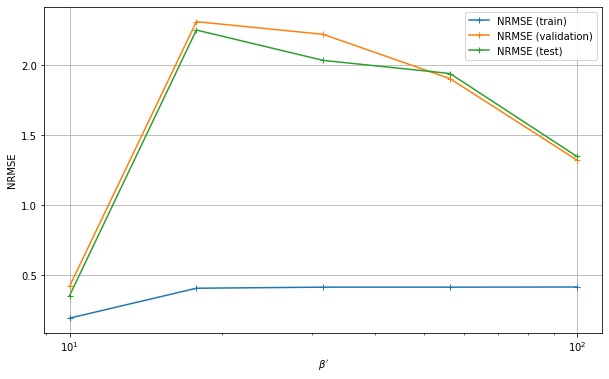

In [479]:
plt.figure(figsize=(10,6))
plt.plot(beta_prime_list,NRMSE_train_list,marker='+',linestyle = '-',label="NRMSE (train)")
plt.plot(beta_prime_list,NRMSE_valid_list,marker='+',linestyle = '-',label="NRMSE (validation)")
plt.plot(beta_prime_list,NRMSE_test_list,marker='+',linestyle = '-',label="NRMSE (test)")
plt.grid(True)
plt.legend(loc="best")
plt.xlabel(r'$\beta^\prime$')
plt.ylabel("NRMSE")
plt.xscale("log")
plt.show()

In [61]:
A=[1,2]
np.std(A)

0.5